## Zomato Restaurants Exploratory Data Analysis

## About the company

"Zomato" is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. 

Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.

Launched in 2010, their technology platform connects customers, restaurant partners and delivery partners, serving their multiple needs. Customers use the platform to search and discover restaurants, read and write customer generated reviews and view and upload photos, order food delivery, book a table and make payments while dining-out at restaurants.

On the other hand, they provide restaurant partners with industry-specific marketing tools which enable them to engage and acquire customers to grow their business while also providing a reliable and efficient last mile delivery service. 

They also operate a one-stop procurement solution, Hyperpure, which supplies high quality ingredients and kitchen products to restaurant partners.They provide their delivery partners with transparent and flexible earning opportunities.


1. https://www.zomato.com/who-we-are

## About the dataset

The dataset is about Zomato restaurants. It is taken from Kaggle, where data has been collected from the Zomato API.

    
The data has been stored in the Comma Separated Value file Zomato.csv.
Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables.

• Restaurant Id       : Unique id of every restaurant across various cities of the world

• Restaurant Name     : Name of the restaurant

• Country Code        : Country in which restaurant is located

• City                : City in which restaurant is located

• Address             : Address of the restaurant

• Locality            : Location in the city

• Locality Verbose    : Detailed description of the locality

• Longitude           : Longitude coordinate of the restaurant's location

• Latitude            : Latitude coordinate of the restaurant's location

• Cuisines            : Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies 

• Currency            : Currency of the country

• Has Table booking   : yes/no

• Has Online delivery : yes/ no

• Is delivering       : yes/ no

• Switch to order menu: yes/no

• Price range         : range of price of food

• Aggregate Rating    : Average rating out of 5

• Rating color        : depending upon the average rating color

• Rating text         : text on the basis of rating of rating

• Votes               : Number of ratings casted by people

We also have another datset with country_code and country name as seperate csv file which is also used in this notebook. 


Dataset link : https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data

## Questions 

The following are the question to be analysed.

Q1. How many countries do zomato provide their service? In which countries they have maximum transactions?

Q2. How many cities from each country have Zomato service? Which are the top 5 cities with maximum outlets?

Q3. Which are the cities that have only one restaurant partnered with zomato and to which country they belong?

Q4. In which countries most of the restaurants have good ratings?

Q5. Which are the popular cuisines that were assessed excellent? And which cusines were assessed poor mostly?

Q6. Which are the top 15 restaurants with maximum outlets? And in which cities these outlets are more?

Q7. Name the popular restaurants with respect to ratings?

Q8. Does Online delivery option and Table booking option impact customer satisfaction?

Q9. Does cost have impact on ratings?

Q10. Which are the most expensive zomato partnered restaurants around the world and to which cities they belong?

Q11. How do we improve business in US and UK since these countries have the most transaction next to India?

Q12. Why the transactions are less in Canada ?

Q13. In Australia more number of cities have zomato service still the transaction is less. What is the reason and how can it be improved? 

Q14. How transactions in Qatar can be increased ?


## Importing libraries

In [1]:
import plotly.express as px
from wordcloud import WordCloud
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591

In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 9551 rows and 21 columns


In [4]:
df_country_name = pd.read_excel('Country-Code.xlsx')
df_country_name.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [5]:
final_df = pd.merge(df, df_country_name, on='Country Code')
final_df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines

In [6]:
print('After merging, there are {} rows and {} columns in the dataframe'.format(
    final_df.shape[0], final_df.shape[1]))

After merging, there are 9551 rows and 22 columns in the dataframe


## Exploratory Data Analysis

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Observation:

    1. There are 22 columns in the dataframe and the index value starts from 0
    
    2. The dataframe has datatypes of "float", "int" and "Object"
    
    3. The object type means that there are "Categorical values" in the dataframe 
    
    4. float and int types are "numerical values"
    
    4. There are few null values in column "Cuisines"
    
    5. The memory usgae is 1.7+ MB

In [8]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [9]:
final_df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [10]:
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [11]:
final_df.loc[:, final_df.isnull().any()].columns

Index(['Cuisines'], dtype='object')

<AxesSubplot:>

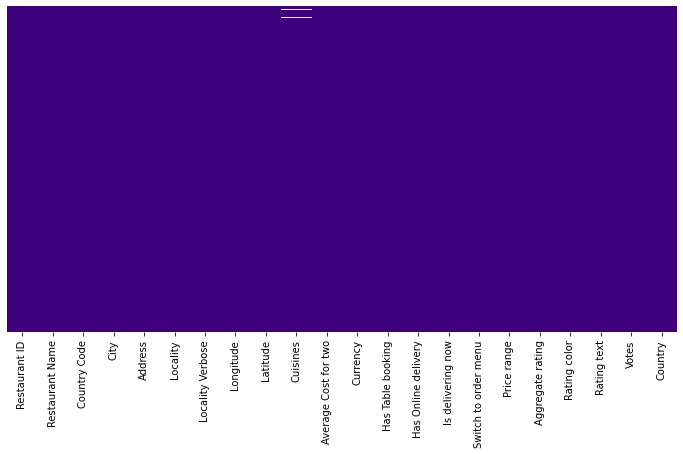

In [12]:
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(final_df.isnull(), yticklabels=False, cmap='Purples_r', cbar=False)

#### Observation :

    * We could see that the null values are very less. We can just drop these null values which helps in understanding the data better

In [13]:
final_df.dropna(inplace = True)

In [14]:
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

## Analyzing each columns

In [15]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Column Country & City

##### Q1. How many countries do zomato provide  their service ? In which countries they have maximum transactions ?

In [16]:
final_df['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [17]:
len(final_df['Country'].unique())

15

In [18]:
final_df['Country'].value_counts()

India             8652
United States      425
United Kingdom      80
South Africa        60
UAE                 60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Qatar               20
Singapore           20
Canada               4
Name: Country, dtype: int64

In [19]:
px.histogram(y='Country', data_frame=final_df)

#### Observation:

    1. Zomato provides its service in 15 countries
    
    2. Maximum number of transaction of zomato are in India
    
    2. The second and third most transactions are in United States and United Kingdom
    
    3. The least transcation of zomato is in Canada

##### Q2. How many cities from each country have Zomato service? Which are the top 5 cities with maximum outlets ?

In [20]:
final_df.groupby(['Country'])['City'].nunique()

Country
Australia         23
Brazil             3
Canada             4
India             43
Indonesia          4
New Zealand        2
Phillipines        9
Qatar              1
Singapore          1
South Africa       6
Sri Lanka          1
Turkey             2
UAE                3
United Kingdom     4
United States     34
Name: City, dtype: int64

In [21]:
px.bar(final_df.groupby(['Country'])['City'].nunique())

In [22]:
final_df['City'].unique()[:10]

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia'], dtype=object)

In [23]:
restaurants_by_cities = final_df.groupby(
    ['City'])['Restaurant ID'].size().sort_values(ascending=False)

In [24]:
restaurants_by_cities[restaurants_by_cities > 100]

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Name: Restaurant ID, dtype: int64

<AxesSubplot:title={'center':'Top 5 Cities with maximum outlets'}, ylabel='City'>

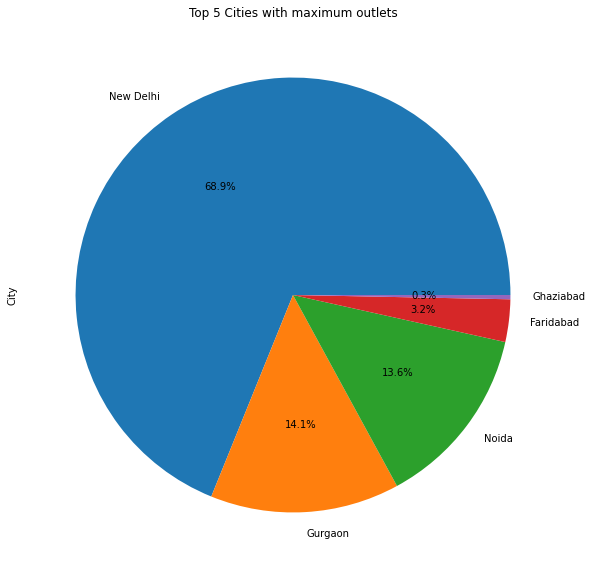

In [25]:
final_df['City'].value_counts()[:5].plot(kind='pie', figsize=(
    10, 10), title="Top 5 Cities with maximum outlets", autopct='%1.1f%%')

#### Observation:
    
    1. Zomato has its service in more than 40 cities in India
    
    2. In United states more than 30 cities have restautrants connected with Zomato
    
    3. And in Australia more than 20 cities have zomato transcations
    
    4. In all other countries less than 10 cities have zomato service
    
    5. We have seen that third most transaction of zomato is from United Kingdom but they only provide service in 4 cities
    
    6. Also we saw Canada has only 4 restaurants and each city have only one restaurant that provide the service
    
    7. There are only 4 cities that have more than 100 restaurants connected with Zomato
    
    8. Top 5 cities with maximim outlets are New Delhi, Gurgaon, Noida, Faridabad and Ghaziabad. And all these cities are from India

##### Q3: Which are the cities that have only one restaurant partnered with zomato and to which country they belong?

In [26]:
len(restaurants_by_cities[restaurants_by_cities == 1])

45

In [27]:
cities_with_one_restaurant = final_df.groupby('Country')['City'].value_counts()
cities_with_one_restaurant[cities_with_one_restaurant == 1]

Country        City            
Australia      Armidale            1
               Balingup            1
               Beechworth          1
               Dicky Beach         1
               East Ballina        1
               Flaxton             1
               Forrest             1
               Huskisson           1
               Inverloch           1
               Lakes Entrance      1
               Lorn                1
               Macedon             1
               Mayfield            1
               Middleton Beach     1
               Montville           1
               Palm Cove           1
               Paynesville         1
               Penola              1
               Phillip Island      1
               Tanunda             1
               Trentham East       1
               Victor Harbor       1
Canada         Chatham-Kent        1
               Consort             1
               Vineland Station    1
               Yorkton             1
India 

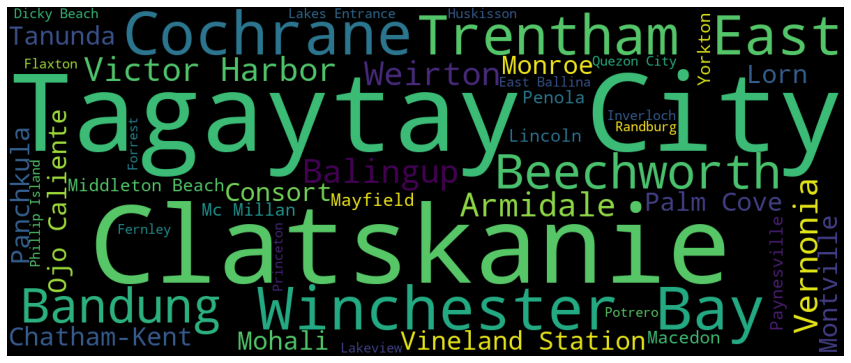

In [28]:
wordcloud = WordCloud(width=1200, height=500, relative_scaling=0.5) .generate_from_frequencies(
    restaurants_by_cities[restaurants_by_cities == 1])

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation:

        1. 46 cities have just only one restaurant providing zomato service
        
        2. Theese cities belong to countries like Australia, Canada, India, Indonesia, Phillipines, South Africa and United States
        
        

### Columns specific to ratings

In [29]:
final_df['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.4, 2.9, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [30]:
final_df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [31]:
final_df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [32]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size(
).reset_index().rename(columns={0: 'Rating count'})

ratings

Aggregate rating Rating color Rating text  Rating count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           495
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           399
22               3.9       Yellow        Good           332
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           143
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            41
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

In [33]:
px.box(x='Rating text', y='Aggregate rating', data_frame=ratings)

#### Observation:

The visualization helps to understand the relation between the Aggregate rating, rating color and Rating text columns.

    1. Aggregate rating = 0.0 and Rating color = "White" means the restaurants are not rated
    
    2. Aggregate rating = 1.8 - 2.4 and Rating color = "Red" means the restaurants are rated Poor
    
    3. Aggregate rating = 2.5 - 3.4 and Rating color = "Orange" means the restaurants are rated Average
    
    4. Aggregate rating = 3.5 - 3.9 and Rating color = "Yellow" means the restaurants are rated Good
    
    5. Aggregate rating = 4.0 - 4.4 and Rating color = "Green" means the restaurants are rated Very Good
    
    6. Aggregate rating = 4.5 - 4.9 and Rating color = "Dark Green" means the restaurants are rated Excellent

In [34]:
px.bar(ratings, x='Aggregate rating', y='Rating count', color='Rating text')

#### Observation:
    
    1. The number of people who have not rated the service is high
    
    2. Most of the people have rated between 2.8 to 3.9
    
    3. Count of the restaurants that were rated below 2.4 is less 
    
    4. Restaurants that were rated 3.1 and 3.2 are more compared to other ratings

In [35]:
aggregated_ratings = ratings.groupby('Rating text').agg(
    {'Rating count': 'sum'}).reset_index()
aggregated_ratings

Rating text  Rating count
0     Average          3734
1   Excellent           300
2        Good          2096
3   Not rated          2148
4        Poor           186
5   Very Good          1078

In [36]:
px.bar(aggregated_ratings, x='Rating text', y='Rating count')

#### Observation:
    
    1. The plot shows that number of restaurants that are rated "Average" is high
    
    2. Restaurants that were rated "Good" and restaurants that are "Not rated" almost have the same counts but we can
    find the exact numbers from "aggregated_ratings" 
    
    3. The restaurants that were rated "Poor" are very low

In [37]:
final_df[final_df['Rating text'] == 'Not rated'].groupby(
    'Country').size().reset_index().rename(columns={0: 'Counts'})

Country  Counts
0          Brazil       5
1           India    2139
2  United Kingdom       1
3   United States       3

#### Observation:
    
    1. The total count of "Not rated" category is 2148. Out of which 2139 zero ratings are from India. Most of the times 
    restaurants were not rated in India
    
    2. Brazil has 5 "Not rated" restaurant counts, United States has 3 and United Kingdom has 1 
    
    3. Except the 4 countries all other countries restaurants were rated

##### Q4: In which countries most of the restaurants have good ratings?

In [38]:
excellent_rating = final_df[final_df['Rating text'] == 'Excellent'].groupby(
    'Country').size().reset_index().rename(columns={0: 'Counts'})
excellent_rating.sort_values(by='Counts', ascending=False, ignore_index=True)

Country  Counts
0            India     116
1    United States      67
2   United Kingdom      23
3              UAE      18
4           Brazil      16
5      New Zealand      12
6      Phillipines      12
7     South Africa      12
8           Turkey      10
9        Indonesia       7
10           Qatar       4
11       Sri Lanka       2
12       Australia       1

In [39]:
verygood_rating = final_df[final_df['Rating text'] == 'Very Good'].groupby(
    'Country').size().reset_index().rename(columns={0: 'Counts'})
verygood_rating.sort_values(by='Counts', ascending=False, ignore_index=True)

Country  Counts
0            India     692
1    United States     178
2     South Africa      35
3              UAE      31
4   United Kingdom      31
5      New Zealand      25
6           Brazil      20
7           Turkey      20
8        Sri Lanka      11
9        Indonesia      10
10     Phillipines       9
11           Qatar       7
12       Australia       5
13       Singapore       3
14          Canada       1

In [40]:
good_rating = final_df[final_df['Rating text'] == 'Good'].groupby(
    'Country').size().reset_index().rename(columns={0: 'Counts'})
good_rating.sort_values(by='Counts', ascending=False, ignore_index=True)

Country  Counts
0            India    1847
1    United States     155
2   United Kingdom      20
3        Australia      13
4     South Africa      12
5           Brazil      11
6              UAE       9
7        Singapore       8
8            Qatar       7
9        Sri Lanka       4
10       Indonesia       3
11          Turkey       3
12     New Zealand       2
13          Canada       1
14     Phillipines       1

#### Observation:
    
    1. 116 restaurants in India were rated as Excellent out of 301 total restaurants that were rated excellent. India also have highest counts in restaurants that were rated Very good and good.
    
    2. United States has 68 restaurants that are rated Excellent. US have the next highest ratings after India
    
    3. Other than India, United States and United Kingdom all other countries have less than 20 restaurants rated as Excellent
    
    4. Also no restaurants from Canada and Singapore were rated excellent
    
    5. In countries like India, Unites States, United KIngdom, UAE and South Africe have many restaurants with good ratings
    

In [41]:
px.histogram(final_df, x="Rating text", color="Country")

#### Observation:

        1. The visualization shows that India has highest counts in all the ratings since the transactions are more there
     
        2. After India, we could see United states have more counts in ratings 
        
        3. All other countries have comparatively very less counts in ratings
        

In [42]:
final_df[final_df['Rating text'] == 'Poor'].groupby(
    'Country').size().reset_index().rename(columns={0: 'Counts'})

Country  Counts
0      Australia       1
1          India     180
2    New Zealand       1
3      Sri Lanka       1
4            UAE       1
5  United States       2

#### Observation:
    
    1. Totally 186 restaurants were rated poor. Out of which 180 restaurants are from India
    
    2. In United States 2 restaurants were rated poor
    
    3. Though United kingdom has third most transaction none of the restaurants were rated poor

### Column Cuisines

In [43]:
final_df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [44]:
popular_cuisines = final_df['Cuisines'].value_counts()[:15]
popular_cuisines

North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Name: Cuisines, dtype: int64

In [45]:
px.bar(final_df['Cuisines'].value_counts().head(50))

#### Observation:
    
Here are the top 50 cuisines served by the zomato outlets

    1. Restaurants that provide only North Indian cuisines have the highest count
    
    2. And approximately 450 restaurants provide both North Indian and Chinese cuisines which are next in the count
    
    3. Restaurants that provide only chinese, fast foods and Mughlai almost have the same counts, however we can get the exact count from popular_cuisines visualisation
    
    4. We could also see that most of the restaurants provide more than 2 cuisines

##### Q5: Which are the popular cuisines that were assessed excellent? And which cusines were assessed poor mostly?

In [46]:
final_df[final_df['Rating text'] == 'Excellent'].groupby('Cuisines').size().reset_index().rename(
    columns={0: 'count'}).sort_values(by='count', ascending=False, ignore_index=True)[:10]

Cuisines  count
0                   Cafe      8
1                Italian      7
2           North Indian      7
3                 Indian      5
4              Ice Cream      5
5                Seafood      5
6  North Indian, Mughlai      4
7               Desserts      4
8                  Asian      4
9    Desserts, Ice Cream      3

In [47]:
final_df[final_df['Rating text'] == 'Poor'].groupby('Cuisines').size().reset_index().rename(
    columns={0: 'count'}).sort_values(by='count', ascending=False, ignore_index=True)[:10]

Cuisines  count
0                     North Indian, Chinese     17
1                          Pizza, Fast Food     13
2                              North Indian     11
3            North Indian, Mughlai, Chinese      9
4                     North Indian, Mughlai      9
5                                   Chinese      8
6  American, Fast Food, Salad, Healthy Food      7
7       South Indian, North Indian, Chinese      5
8                        Chinese, Fast Food      5
9                     Chinese, North Indian      4

#### Observation:
    
    1. Mostly cafe, Italian and Indian cuisines were rated Excellent in many restaurants
    
    2. We could see that most of the restaurants which are assessed Excellent serve less than 3 cuisine 
    
    3. However the count of restaurants that serve one cuisine rated Excellent are high comparatively

    4. Cuisines like North Inidan, Chinese, Fast Food, Mughali were rated poor mostly. We could see some of these cuisines were also rated good in other restaurants, may be few restaurants donot provide good taste. 

##### Q6. Which are the top 15 restaurants with maximum outlets? And in which cities these outlets are more?

In [48]:
final_df['Restaurant Name'].value_counts().head(15)

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Giani's             22
Dunkin' Donuts      22
Barista             22
Pind Balluchi       20
Costa Coffee        20
Name: Restaurant Name, dtype: int64

In [49]:
final_df.groupby('City')['Restaurant Name'].value_counts().sort_values(ascending= False)[:20]

City       Restaurant Name     
New Delhi  Cafe Coffee Day         57
           Domino's Pizza          55
           Subway                  38
           Green Chick Chop        37
           McDonald's              33
           Giani                   24
           Keventers               24
           Giani's                 17
           Wah Ji Wah              14
           Aggarwal Sweets         14
Noida      Cafe Coffee Day         13
New Delhi  Baskin Robbins          13
           Pizza Hut Delivery      13
           Republic of Chicken     13
           Sagar Ratna             13
           Twenty Four Seven       13
           34, Chowringhee Lane    12
           Pizza Hut               12
Gurgaon    Cafe Coffee Day         11
           Subway                  11
Name: Restaurant Name, dtype: int64

<AxesSubplot:title={'center':'Top 15 Restaurants with maximum outlets'}, ylabel='Restaurant Name'>

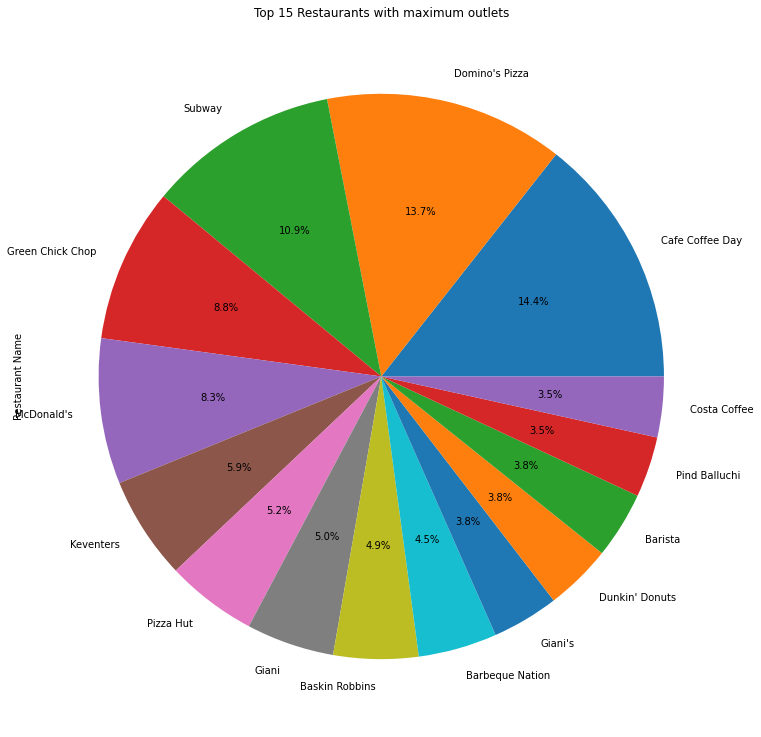

In [50]:
final_df['Restaurant Name'].value_counts().head(15).plot(kind='pie', figsize=(
    13, 13), title="Top 15 Restaurants with maximum outlets", autopct='%1.1f%%')

#### Obsevation:

        1. Cafe Coffee Day, Domino's Pizza, Subway, Green Chick Chop, Green Chick Chop and Green Chick Chop have more than 50 outlets
        2. Restaurants like McDonald's, Keventers, Pizza Hut, Giani, Baskin Robbins, Barbeque Nation, Dunkin' Donuts, Barista, Costa Coffee and Pind Balluchi have more than 20 outlets 
        
        3. In cities like New Delhi, Noida and Gurgeon these outlets are more


##### Q7. Name the popular restaurants with respect to ratings?

In [51]:
restaurants_rated_excellent = final_df[final_df['Rating text'] == 'Excellent'].groupby('Restaurant Name').size().reset_index().rename(
    columns={0: 'count'}).sort_values(by='count', ascending=False, ignore_index=True)[:15]

restaurants_rated_excellent

Restaurant Name  count
0             Barbeque Nation     11
1   AB's - Absolute Barbecues      4
2                     Chili's      4
3            Talaga Sampireun      3
4                   Big Chill      2
5                     Dishoom      2
6      The Cheesecake Factory      2
7          Naturals Ice Cream      2
8           Natural Ice Cream      2
9                    Gymkhana      2
10                      Mocha      2
11                     Twigly      2
12                     Onesta      2
13    AB's Absolute Barbecues      2
14           Silantro Fil-Mex      2

In [52]:
final_df[final_df['Rating text'] == 'Poor'].groupby('Restaurant Name').size().reset_index().rename(
    columns={0: 'count'}).sort_values(by='count', ascending=False, ignore_index=True)[:14]

Restaurant Name  count
0       Domino's Pizza     12
1               Subway      7
2           Wah Ji Wah      7
3   Pizza Hut Delivery      5
4          Sagar Ratna      4
5      Cafe Coffee Day      4
6                  KFC      3
7       Viva Hyderabad      3
8         Flying Cakes      3
9       Slice of Italy      3
10          Chawla's_      3
11          Chawla's 2      2
12         Public Cafe      2
13       Punjabi Rasoi      2

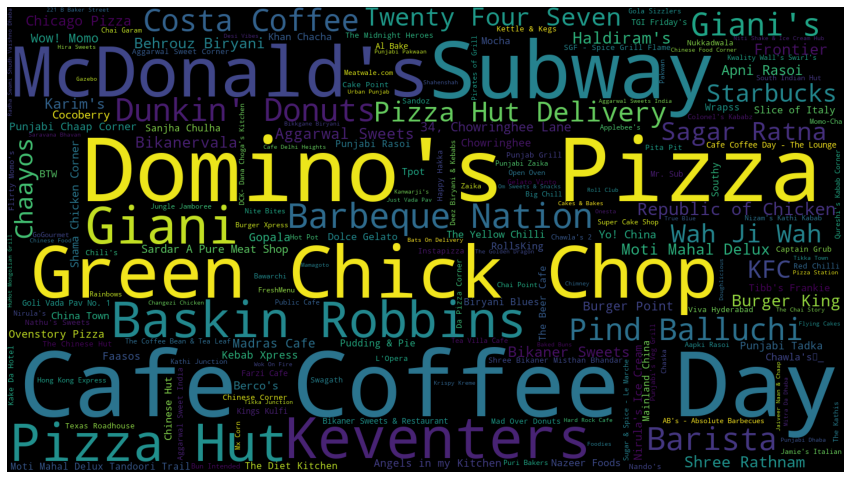

In [53]:
wordcloud = WordCloud(width=1440, height=800, relative_scaling=0.5) .generate_from_frequencies(
    final_df['Restaurant Name'].value_counts())

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Observation:
    
    1. These are 272 Restaurant that were rated excellent.
    
    2. Here we display the top 14 restaurants which are rated excellent more than once. All other restaurants were rated Excellent only once.
    
    3. Barbeque Nation and AB's - Absolute Barbecues are the restaurants that are rated excellent more comparatively. 
    
    4. We also see that restaurants having more outlets like Domino's Pizza, Subway, Cafe Coffee Day, Pizza Hut Delivery also have high counts as rated poor.
   

### Column  "Currency, Has Online delivery,  Has Table Booking" 

In [54]:
final_df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [55]:
final_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size(
).reset_index(name='count').drop('count', axis=1, inplace=False)

Country                Currency
0        Australia               Dollar($)
1           Brazil      Brazilian Real(R$)
2           Canada               Dollar($)
3            India      Indian Rupees(Rs.)
4        Indonesia  Indonesian Rupiah(IDR)
5      New Zealand           NewZealand($)
6      Phillipines        Botswana Pula(P)
7            Qatar         Qatari Rial(QR)
8        Singapore               Dollar($)
9     South Africa                 Rand(R)
10       Sri Lanka   Sri Lankan Rupee(LKR)
11          Turkey        Turkish Lira(TL)
12             UAE      Emirati Diram(AED)
13  United Kingdom              Pounds(£)
14   United States               Dollar($)

#### Observation:

    1. Each country have their own currencies

In [56]:
final_df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
px.pie(final_df, names="Has Online delivery", title='Online Delivery Option')

In [58]:
aggregated_ratings

Rating text  Rating count
0     Average          3734
1   Excellent           300
2        Good          2096
3   Not rated          2148
4        Poor           186
5   Very Good          1078

##### Q8. Does Online delivery option and Table booking option impact customer satisfaction

In [59]:
final_df[final_df['Has Online delivery']
         == 'Yes'].groupby('Rating text').size()

Rating text
Average      1105
Excellent      39
Good          818
Not rated      96
Poor          116
Very Good     277
dtype: int64

In [60]:
final_df[final_df['Has Online delivery']
         == 'No'].groupby('Rating text').size()

Rating text
Average      2629
Excellent     261
Good         1278
Not rated    2052
Poor           70
Very Good     801
dtype: int64

Text(0, 0.5, 'Count')

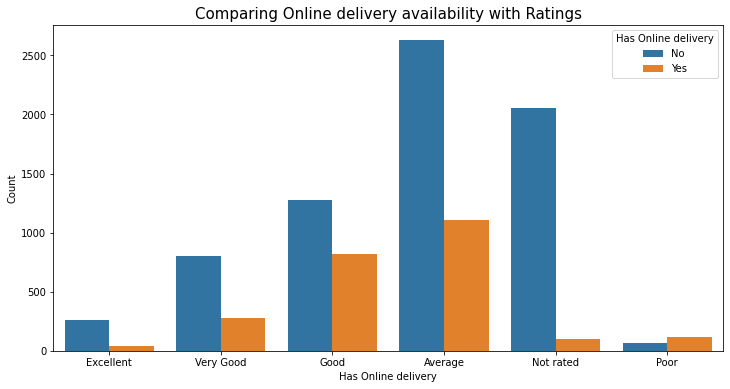

In [61]:
ax = sns.countplot(x='Rating text', hue='Has Online delivery', data=final_df)
ax.set_title(
    label="Comparing Online delivery availability with Ratings", fontsize=15)
ax.set_xlabel(xlabel="Has Online delivery")
ax.set_ylabel(ylabel="Count")

In [62]:
final_df[final_df['Has Online delivery'] == 'Yes'].groupby(['Country']).size()

Country
India    2423
UAE        28
dtype: int64

#### Observation:

    1. Total count of excellent ratings is 301, out of which 262 belongs to restaurants that do not provide online delivery and  39 belongs to restaurants that have online delivery service 
    
    2. Total count of Good ratings is 2100, out of which 1282 belongs to restaurants that has no online delivery and 818 belongs to restaurants providing online delivery
    
    3. Out of 186 total restaurants that were rated poor, 70 are from restaurants not providing online delivery and 116 are from restaurants that have online delivery option
    
    4. This shows having online delivery option has no impact on ratings
    
    5. Its also clear that only India and UAE provide online delivery service


In [63]:
final_df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

Text(0, 0.5, 'Count')

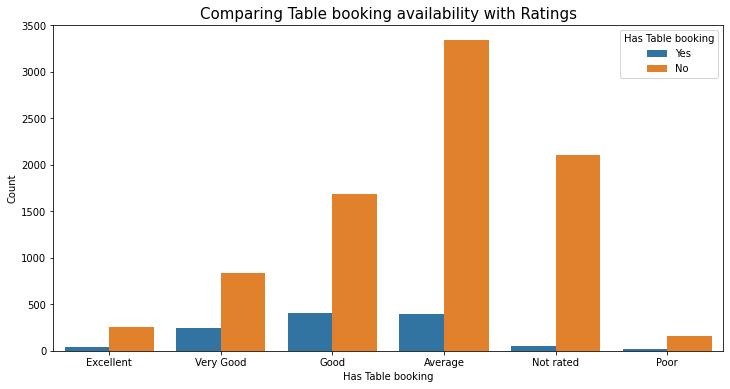

In [64]:
ax = sns.countplot(x='Rating text', hue='Has Table booking', data=final_df)
ax.set_title(
    label='Comparing Table booking availability with Ratings', fontsize=15)
ax.set_xlabel(xlabel='Has Table booking')
ax.set_ylabel(ylabel='Count')

In [65]:
final_df[final_df['Has Table booking'] == 'Yes'].groupby(['Country']).size()

Country
India             1111
Phillipines         14
Qatar                1
South Africa         2
UAE                 18
United Kingdom      12
dtype: int64

#### Observation:
    
    1. Restaurants that do not provide table booking have higher counts in ratings
    
    2. Table booking also do not have much impact on being rated
    
    3. India has the highest number of restaurants who take table bookings
    
    4. Though United States have the second highest transaction none of the restaurants in US provide table booking option
    
    

##### Q9: Does cost have impact on ratings?

### Average Cost for two, Votes

In [66]:
final_df['Average Cost for two'].value_counts()[:10]

500    900
300    897
400    857
200    687
600    652
250    461
350    457
700    403
150    367
100    353
Name: Average Cost for two, dtype: int64

Text(0, 0.5, 'Average Cost for two')

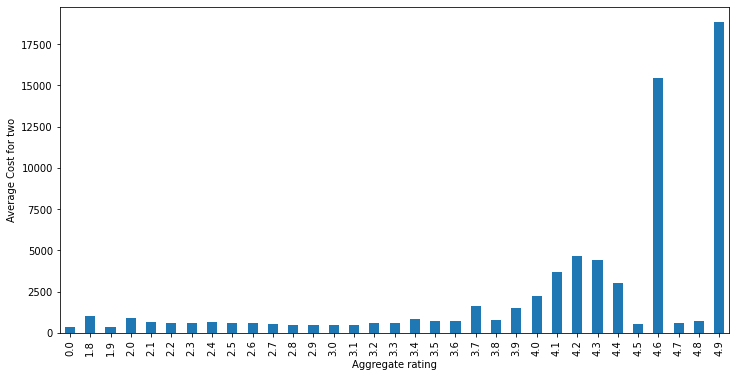

In [67]:
final_df.groupby('Aggregate rating')[
    'Average Cost for two'].mean().plot(kind='bar')
plt.ylabel('Average Cost for two')

#### Observation:

            1. Most of the restaurants have "Average cost for two" between 100 to 500 
            
            2. The restaurants rated good and excellent are mostly when the "average cost for two" is higher than 2000. However we could also see some of the excellent ratings belong to restaurants where "average cost for two" is below 1000.
            
            3. Cost doesnot have a real impact on ratings as higher ratings are given for both foods with higher and lower price ranges

#### Q10: Which are the most expensive zomato partnered restaurants around the world and to which cities they belong?

In [68]:
costly_restaurants = final_df.nlargest(20, 'Average Cost for two')

In [69]:
px.bar(costly_restaurants,
       x='Restaurant Name',
       color='City',
       y='Average Cost for two',
       title='Costly restaurants having Zomato Service')

#### Observation:

        1. These are the top 20 restaurants with high price range and most of these restaurants belong to the city Jakarta
        
        2. Cities like Tangerang, Bogor and Bandung also have restaurants that are expensive
      
        3. Restaurant Talaha Sampireun is available in both Jakarta and Tangerang
        

Text(0, 0.5, 'Votes')

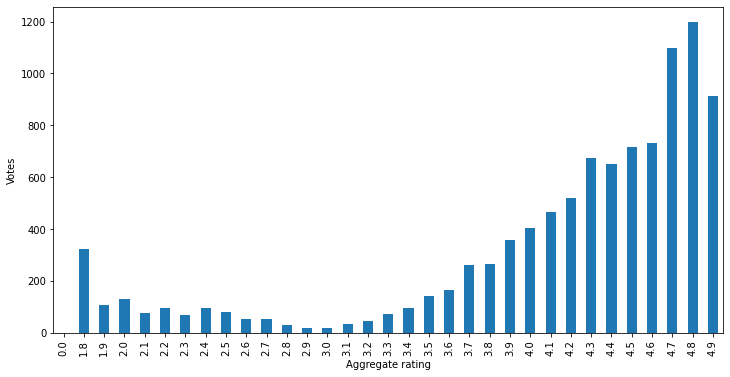

In [70]:
final_df.groupby('Aggregate rating')['Votes'].mean().plot(kind='bar')
plt.ylabel('Votes')

#### Observation:
         
    1. Restaurants which are rated good and excellent have more number of votes higher than 400
    
    2. Restaurants which are rated average and below have votes lower than 400

### United States

#### Q11: How do we improve business in US and UK since these countries have the most transaction next to India?

* United States totally has 434 transactions from 35 cities which we have seen from the previous analysis

In [71]:
final_df[final_df['Country'] == 'United States'].groupby(
    'Cuisines').size().sort_values(ascending=False)[:10]

Cuisines
Mexican                     25
American                    16
Chinese                      9
BBQ                          9
Japanese, Steak, Sushi       8
Italian, Pizza               8
American, Seafood, Steak     8
Seafood                      8
Italian                      8
Japanese, Sushi              7
dtype: int64

#### Observation:
    
    1. The above are the top 10 most offered cuisines that zomato restaurants provide in United States

In [72]:
final_df[final_df['Country'] == 'United States'].groupby(
    'Rating text').size().reset_index().rename(columns={0: 'counts'})

Rating text  counts
0     Average      20
1   Excellent      67
2        Good     155
3   Not rated       3
4        Poor       2
5   Very Good     178

In [73]:
px.bar(final_df.loc[(final_df['Country'] == 'United States') & (
    final_df['Rating text'] == 'Excellent')].groupby('Cuisines').size())

#### Observation:

        1. These are the cuisines in US that were rated excellent. Mostly American, BBQ, Sandwich are common
    
        2. Some cuisines like Asian, Burger, Italian, Seafood are rated excellent many times

In [74]:
final_df[final_df['Country'] == 'United States'].groupby(
    ['Has Online delivery', 'Has Table booking']).size()

Has Online delivery  Has Table booking
No                   No                   425
dtype: int64

In [75]:
df_US = final_df[final_df['Country'] == 'United States']
cities_in_US = df_US['City'].value_counts()
cities_in_US.head()

Davenport    20
Dalton       20
Boise        20
Pensacola    20
Dubuque      20
Name: City, dtype: int64

Text(0, 0.5, 'No of Outlets')

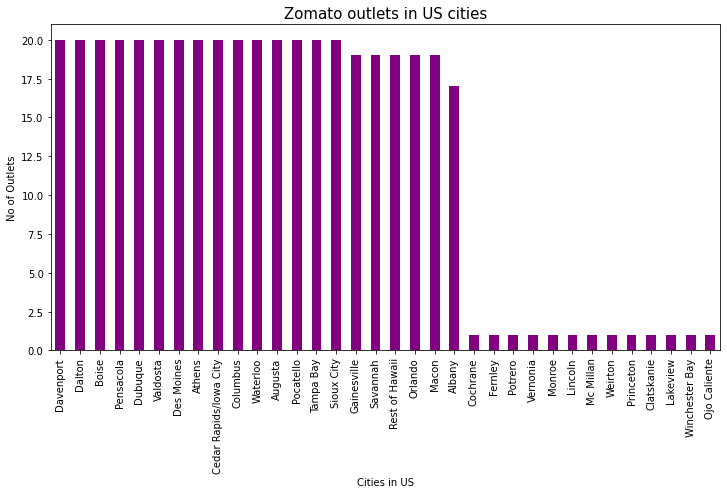

In [76]:
cities_in_US.plot.bar(color='purple')
plt.title('Zomato outlets in US cities', fontsize=15)
plt.xlabel('Cities in US')
plt.ylabel('No of Outlets')

#### Observation:
    
    1. None of the zomato restaurants in United States have Online delivery and Table booking option
    
    2. Many cities in US have 20 Zomato outlets
    
    3. In more than 10 cities only one outlet is available
    
    4. Increasing the number of outlets in cities with lower restaurant count can improve transaction.
    
    5. Also connecting with more restaurants providing popular cusines like American, Asian, Seafood, BBQ and Italian could also help with the business
    
 

### United Kingdom

* United Kindgom has 80 zomato restaurantsfrom four cities which have been discussed previously

In [77]:
final_df.loc[(final_df['Country'] == 'United Kingdom')].groupby('City').size()

City
Birmingham    20
Edinburgh     20
London        20
Manchester    20
dtype: int64

In [78]:
final_df[final_df['Country'] == 'United Kingdom'].groupby(
    'Rating text').size().reset_index().rename(columns={0: 'counts'})

Rating text  counts
0     Average       5
1   Excellent      23
2        Good      20
3   Not rated       1
4   Very Good      31

In [79]:
px.bar(final_df.loc[(final_df['Country'] == 'United Kingdom') & (
    final_df['Rating text'] == 'Excellent')].groupby('Cuisines').size())

In [80]:
final_df[final_df['Country'] == 'United Kingdom'].groupby(
    ['Has Online delivery', 'Has Table booking']).size()

Has Online delivery  Has Table booking
No                   No                   68
                     Yes                  12
dtype: int64

#### Observation:

      1. United Kingdom having the third most of zomato service, they have 80 restaurants connected with Zomato from 4 
        cities
        
      2. In all 4 cities 20 restaurants provide zomato service. There may be some missing information as the count seems to be equal in all cities.
    
      3. In UK none of the restaurants were rated poor
        
      4. Cuisines with excellent ratings include mostly American, Indian, British, Chinese, Italian and Cafes
        
      5. Out of 80 restaurants 12 provide Table booking option and none of the restaurants have Online delivery option
      
      6. Exypanding the business to many cities will definitely help in increasing the transaction

##### Q12: Why the transactions are less in Canada ?

### Canada

* Canada has 4 restaurants connected with zomato from 4 cities which we have analysed before

In [81]:
final_df[final_df['Country'] == 'Canada'].groupby(
    ['Restaurant Name', 'City', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Online delivery']).agg({'Rating text': 'sum'})

Rating text
Restaurant Name       City             Cuisines                      Average Cost for two Currency  Has Online delivery            
Arigato Sushi         Yorkton          Asian                         25                   Dollar($) No                      Average
Consort Restaurant    Consort          Chinese, Canadian             25                   Dollar($) No                      Average
Lake House Restaurant Vineland Station Italian, Mediterranean, Pizza 70                   Dollar($) No                    Very Good
Tokyo Sushi           Chatham-Kent     Japanese, Sushi               25                   Dollar($) No                         Good

In [82]:
final_df[final_df['Country'] == 'Canada'].groupby(
    ['Has Online delivery', 'Has Table booking']).size()

Has Online delivery  Has Table booking
No                   No                   4
dtype: int64

#### Observation:

      1. None of the restaurants in Canada were rated excellent and poor
     
      2. Restaurants providing cuisines like Italian, Mediterranean, Pizza, Japanese, Chinese, Sushi, Canadian, Asain are connected with zomato. Among these Italian, Pizza and Mediterranean were rated better
        
      3. None of the zomato restaurants in canada provide either online delivery or table booking
        
      4. We see canada have less outlets available only in 4 cities, by incresing the number of outlets in these 4 cities and by extending the service to many cities will improve the transactions

##### Q13. In Australia more number of cities have zomato service still the transaction is less. What is the reason and how can it be improved? 

### Australia

In [83]:
df_australia = final_df[final_df['Country'] == 'Australia']
len(df_australia)

24

In [84]:
final_df.loc[(final_df['Country'] == 'Australia')].groupby('City').size()

City
Armidale           1
Balingup           1
Beechworth         1
Dicky Beach        1
East Ballina       1
Flaxton            1
Forrest            1
Hepburn Springs    2
Huskisson          1
Inverloch          1
Lakes Entrance     1
Lorn               1
Macedon            1
Mayfield           1
Middleton Beach    1
Montville          1
Palm Cove          1
Paynesville        1
Penola             1
Phillip Island     1
Tanunda            1
Trentham East      1
Victor Harbor      1
dtype: int64

In [85]:
len(final_df.loc[(final_df['Country'] == 'Australia')].groupby('City').count())

23

In [86]:
(final_df.loc[(final_df['Country'] == 'Australia') & (
    final_df['Rating text'] == 'Excellent')].groupby(['Restaurant Name','City', 'Cuisines']).size())

Restaurant Name      City        Cuisines       
Bridge Road Brewers  Beechworth  Pizza, Bar Food    1
dtype: int64

In [87]:
df_australia.groupby('Rating text').size(
).reset_index().rename(columns={0: 'counts'})

Rating text  counts
0     Average       4
1   Excellent       1
2        Good      13
3        Poor       1
4   Very Good       5

In [88]:
px.bar(final_df.loc[(final_df['Country'] == 'Australia') & (
    final_df['Rating text'] == 'Good')].groupby('Cuisines').size())

#### Observation:

     1. In Australia though zomato service is available in 23 cities the transaction is low. This is because they have less number of outlets in each cities and mostly every city have only one outlet.
         
     2. With respect to ratings most of the restaurants were rated Good. Restaurants that were rated excellent and poor have only one count.
         
     3. Bridge Road Brewers from Beechworth city is the only restaurant that was rated excellent and they provide cuisines like Pizza and Bar Food 
         
     4. Bar food, Cafe , Coffe and Tea, Modern Australian, Steak and Italian are the popular cuisines rated good.
         
     5. To improve transaction in Australia zomato should extend its service to more outlets. Connecting with outlets who provide popular cusines will help

##### Q14. How transactions in Qatar can be increased ?

### Qatar

* Qatar has 20 restaurant from one city

In [89]:
df_qatar = final_df[final_df['Country'] == 'Qatar']

In [90]:
df_qatar.groupby('Rating text').size(
).reset_index().rename(columns={0: 'counts'})

Rating text  counts
0     Average       2
1   Excellent       4
2        Good       7
3   Very Good       7

In [91]:
df_qatar['Has Online delivery'].value_counts()

No    20
Name: Has Online delivery, dtype: int64

In [92]:
df_qatar['Has Table booking'].value_counts()

No     19
Yes     1
Name: Has Table booking, dtype: int64

In [93]:
df_qatar[df_qatar['Rating text'] == 'Excellent'].groupby(
    ['Restaurant Name', 'City', 'Cuisines', 'Has Table booking', 'Average Cost for two', 'Currency']).agg({'Rating text': 'sum'})

Rating text
Restaurant Name           City Cuisines Has Table booking Average Cost for two Currency                   
Gymkhana                  Doha Indian   Yes               250                  Qatari Rial(QR)   Excellent
Mainland China Restaurant Doha Chinese  No                250                  Qatari Rial(QR)   Excellent
Paper Moon                Doha Italian  No                400                  Qatari Rial(QR)   Excellent
Zaffran Dining Experience Doha Indian   No                300                  Qatari Rial(QR)   Excellent

In [94]:
df_qatar['Average Cost for two'].unique()

array([150,  80, 300,  60, 170, 100, 220, 250, 110,  50, 500, 200, 550,
       445, 400, 160], dtype=int64)

#### Observation:

        1. No restaurants were rated poor in Qatar
    
        2. None of the restaurants in Qatar has online delivery and only one restaurant provide Table booking option
        
        3. Cuisines like Italian, Indian and Chinese have excellent ratings
        
        4. The maximum average ccost for two is 550 and minimum is 60
        
        5. In Qatar Zomato service is availble only in one city "Doha"
        
        6. Providing popular Cusines in more cities helps improve the transaction in Qatar

In [95]:
import plotly.express as px
fig = px.scatter_geo(final_df, lat=final_df['Latitude'],
                     lon=final_df['Longitude'], color="Country", hover_name="Country")
fig.show()

#### Observation:

        1. We could see some outliers with the map where some points show wrong information about the country name 

## Conclusion:

1. Zomato provides its service in 15 countries.


2. Most of the transaction of Zomato are in India, where its service is available in 43 cities.


3. Second most transcation of Zomato is from United States, where the service is available in 35 cities.


4. Third most transaction of Zomato is from United Kingdom, but their service is availble only in 4 cities in Uk. However, the number of transaction in India is very high compared to US and Uk and the number are not any close. This is because Zomato is  a Indian based company and is more popula in India.


5. There are around 46 cities from the above listed 15 countries, that have only one zomato serving restaurant in each city.They belong to Australia, Canada, India, Indonesia, Phillipines, South Africa and United States. By increasing the number of outlets per city will help increase the transaction in these countries.


6. Least transction of Zomato is from Canada.This may be because zomato provides its service in only 4 cities and each city has only one zomato restaurant. Zomato can start with the cities that they already provide service and increase the number of restaurants in these cities. Later can expand to different cities in Canda for more transactions.


7. From the dataset its clear that Online delivery option did not have impact on good ratings. Excellent, Good and Average rating counts are higher for restaurants who do not provide online delivery service. And count of restaurants rated poor are compartively less in restaurants that do not provide online service. This may be because most of the time Zomato is used to serach for good restaurant to "Dine in" and have given ratings for those restaurants.


8. Table booking option also donot have impact on rating counts. This may be because people prefer walk in and enjoy their food rather booking table in advance.


9. Zomato can also improve its transaction in countries by connecting with restaurants that provide popular cuisines in specific countries. From the data we saw specific cuisines were rated well.
Like in US - connecting with restaurants having cuisines like American, BBQ, Italian, Asian ,Sandwich and Seafood could increse the transcation.
In Uk providing American, British, Indian, Burger, Chinese, Italian and cafes cuisines will help. 
In canada cuisines like Italian, pizza, Mediteran, chinese, asian and sushi are most preferred.


10. In Qatar, zomato service provides less cuisine option. Incresing the number of cuisines and restaurants will help with the transaction.


11. Zomato is connected with many Indian cusines restaurants around the world where they have good ratings too.


12. Since popularity of zomato helps in more transcation in India Zomato has to break ground in other markets by advertising and partnering with well established restaurants.


13. Restaurants providing Dine in service are rated high and good, so giving offers on dine in would also help improve the business


14. Having revenue per year details for each restaurant would have helped to analyse the transaction better. Also would have helped in taking decisions with connecting and investing in more restaurants.